In [78]:
import numpy as np
import pandas as pd

In [79]:
data = pd.read_excel("D:/project/Data/Wb/WB_Final.xlsx")

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4018 non-null   datetime64[ns]
 1   temp       4018 non-null   float64       
 2   humidity   4018 non-null   float64       
 3   cpi        4018 non-null   float64       
 4   peak_load  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 157.1 KB


In [81]:
df = data[['date','peak_load']]

In [82]:
df.head()

,date,peak_load
0,2013-04-01,6163.0
1,2013-04-02,6473.0
2,2013-04-03,6471.0
3,2013-04-04,6553.0
4,2013-04-05,6663.0


In [83]:
# Rename the columns to fit Prophet's requirements
df = df.rename(columns={'date': 'ds', 'peak_load': 'y'})


In [84]:
df.columns

Index(['ds', 'y'], dtype='object')

In [85]:
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [86]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=False)


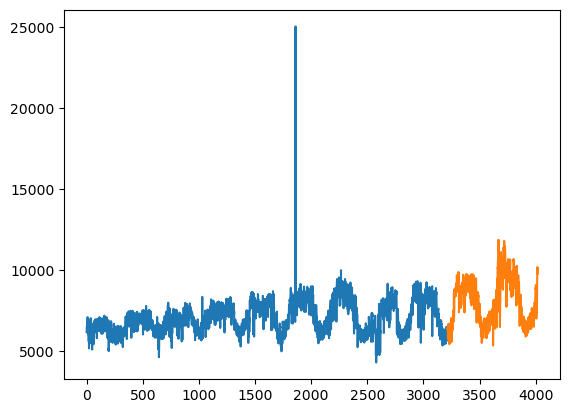

In [87]:
plt.plot(train['y'])
plt.plot(test['y'])

In [94]:
model = Prophet()
model.fit(train)

20:15:35 - cmdstanpy - INFO - Chain [1] start processing
20:15:36 - cmdstanpy - INFO - Chain [1] done processing


<h3>For train data

In [95]:
futuretrain = model.make_future_dataframe(periods=len(train), freq='D')
forecasttrain = model.predict(futuretrain)
forecasttrain[['ds','yhat']].tail()

,ds,yhat
6422,2030-11-01,12681.123445
6423,2030-11-02,12616.782325
6424,2030-11-03,12502.571043
6425,2030-11-04,12199.066214
6426,2030-11-05,12472.043480


In [96]:
forecast_train = forecasttrain[['ds', 'yhat']].iloc[-len(train):].reset_index(drop=True)
train = train.reset_index(drop=True)

In [97]:
train

,ds,y
0,2013-04-01,6163.0
1,2013-04-02,6473.0
2,2013-04-03,6471.0
3,2013-04-04,6553.0
4,2013-04-05,6663.0
...,...,...
3209,2022-01-13,6286.0
3210,2022-01-14,6503.0
3211,2022-01-15,6124.0
3212,2022-01-16,5655.0


In [98]:
# Combine the actual values and predicted values
resultstrain = pd.concat([train, forecast_train['yhat']], axis=1)
resultstrain = resultstrain.rename(columns={'yhat': 'predicted'})


In [99]:
resultstrain

,ds,y,predicted
0,2013-04-01,6163.0,6978.613135
1,2013-04-02,6473.0,7043.270345
2,2013-04-03,6471.0,7068.200428
3,2013-04-04,6553.0,7115.614563
4,2013-04-05,6663.0,7103.544992
...,...,...,...
3209,2022-01-13,6286.0,12681.123445
3210,2022-01-14,6503.0,12616.782325
3211,2022-01-15,6124.0,12502.571043
3212,2022-01-16,5655.0,12199.066214


<h3>For test data

In [100]:
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat']].tail()


,ds,yhat
4012,2024-03-27,9417.620698
4013,2024-03-28,9446.520539
4014,2024-03-29,9497.345797
4015,2024-03-30,9488.048503
4016,2024-03-31,9427.095267


In [101]:
forecast = model.predict(future)
# Extract only the predictions for the test period
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test):].reset_index(drop=True)
test = test.reset_index(drop=True)



In [102]:
test

,ds,y
0,2022-01-18,6360.0
1,2022-01-19,6451.0
2,2022-01-20,6466.0
3,2022-01-21,6445.0
4,2022-01-22,6231.0
...,...,...
799,2024-03-27,9056.0
800,2024-03-28,9480.0
801,2024-03-29,9790.0
802,2024-03-30,10188.0


In [103]:
# Combine the actual values and predicted values
results = pd.concat([test, forecast_test['yhat']], axis=1)
results = results.rename(columns={'yhat': 'predicted'})


In [104]:
results

,ds,y,predicted
0,2022-01-18,6360.0,6978.613135
1,2022-01-19,6451.0,7043.270345
2,2022-01-20,6466.0,7068.200428
3,2022-01-21,6445.0,7115.614563
4,2022-01-22,6231.0,7103.544992
...,...,...,...
799,2024-03-27,9056.0,9417.620698
800,2024-03-28,9480.0,9446.520539
801,2024-03-29,9790.0,9497.345797
802,2024-03-30,10188.0,9488.048503


In [105]:
#results.to_csv('result.csv', index=False)

## Accuracy Metrics

In [106]:
# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae1 = mean_absolute_error(resultstrain['y'], resultstrain['predicted'])
mse1 = mean_squared_error(resultstrain['y'], resultstrain['predicted'])
rmse1 = np.sqrt(mse1)

mape1 = mean_absolute_percentage_error(resultstrain['y'], resultstrain['predicted'])
print('Train rasults')
print(f'MAE: {mae1}')
print(f'MSE: {mse1}')
print(f'RMSE: {rmse1}')
print(f'MAPE: {mape1 * 100}%')  # Convert MAPE to percentage
print(f'Accuracy: {100 - (mape1 *100)}%')

Train rasults
MAE: 3186.93730200654
MSE: 12595751.592906058
RMSE: 3549.0493928524097
MAPE: 46.2072180943383%
Accuracy: 53.7927819056617%


In [107]:
# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(results['y'], results['predicted'])
mse = mean_squared_error(results['y'], results['predicted'])
rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(results['y'], results['predicted'])
print('Test Results')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape * 100}%')  # Convert MAPE to percentage
print(f'Accuracy: {100 - (mape *100)}%')


Test Results
MAE: 824.449707633467
MSE: 969709.6910862254
RMSE: 984.7383871294068
MAPE: 10.54779086141295%
Accuracy: 89.45220913858705%


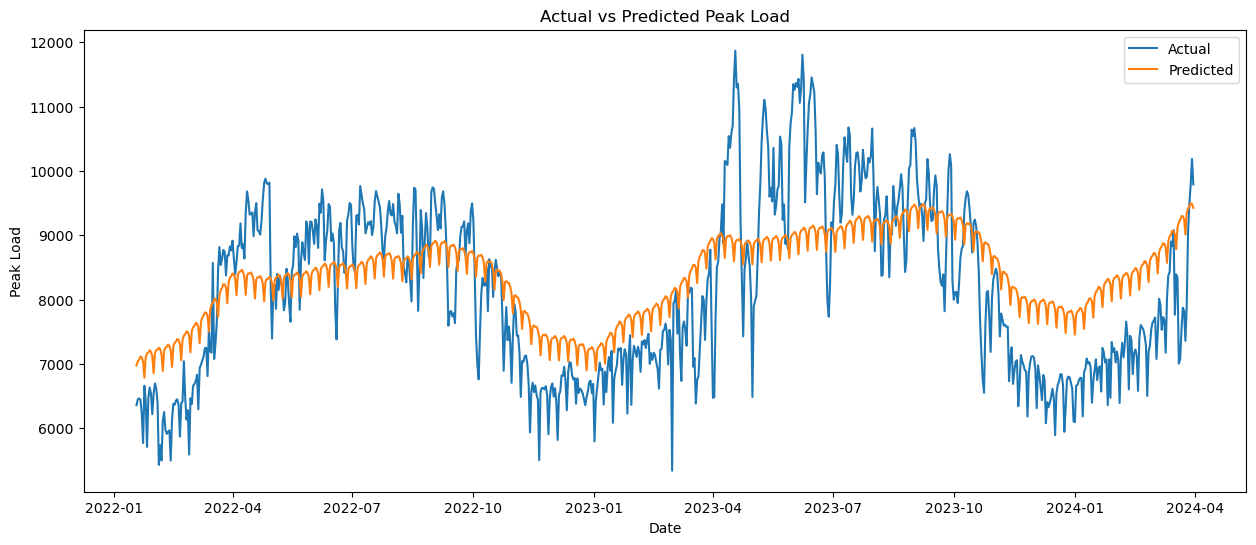

In [109]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(results['ds'], results['y'], label='Actual')
plt.plot(results['ds'], results['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Peak Load')
plt.title('Actual vs Predicted Peak Load')
plt.legend()
plt.show()

## Forecasting of Unknown Peak Load based on Training data and Forecasted for period upto  2025

In [116]:
train.tail()

,ds,y
3209,2022-01-13,6286.0
3210,2022-01-14,6503.0
3211,2022-01-15,6124.0
3212,2022-01-16,5655.0
3213,2022-01-17,6285.0


In [126]:
modelwhole = Prophet()
modelwhole.fit(df)

20:25:48 - cmdstanpy - INFO - Chain [1] start processing
20:25:49 - cmdstanpy - INFO - Chain [1] done processing


In [127]:
future_unknown = modelwhole.make_future_dataframe(periods=365 * 3 ,
                                            freq='D')



In [128]:
forecast_unknown = modelwhole.predict(future_unknown)
forecast_unknown[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
5107,2027-03-27,9989.343747,7067.431721,13165.896342,9684.456605,6924.081255,12826.565040
5108,2027-03-28,9894.686604,6829.534601,13210.277949,9685.468500,6922.052388,12830.645237
5109,2027-03-29,9797.385217,6909.924744,13131.300951,9686.480395,6920.023521,12834.725434
5110,2027-03-30,10104.914019,7237.333553,13426.083753,9687.492290,6917.994654,12838.791728
5111,2027-03-31,10174.843607,7246.654627,13546.688127,9688.504184,6915.965787,12842.469561


In [124]:
forecast_unknown[['ds','yhat']].to_csv('forecast_to_27.csv', index=False)

D:\New folder\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\New folder\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


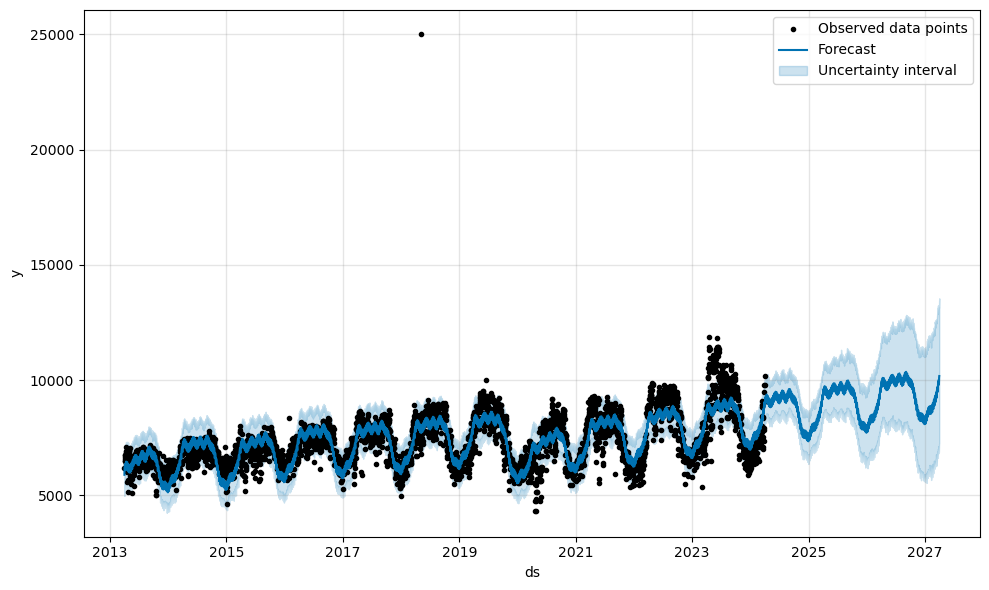

In [129]:
fig1 = modelwhole.plot(forecast_unknown, include_legend=True)

D:\New folder\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\New folder\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
D:\New folder\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'

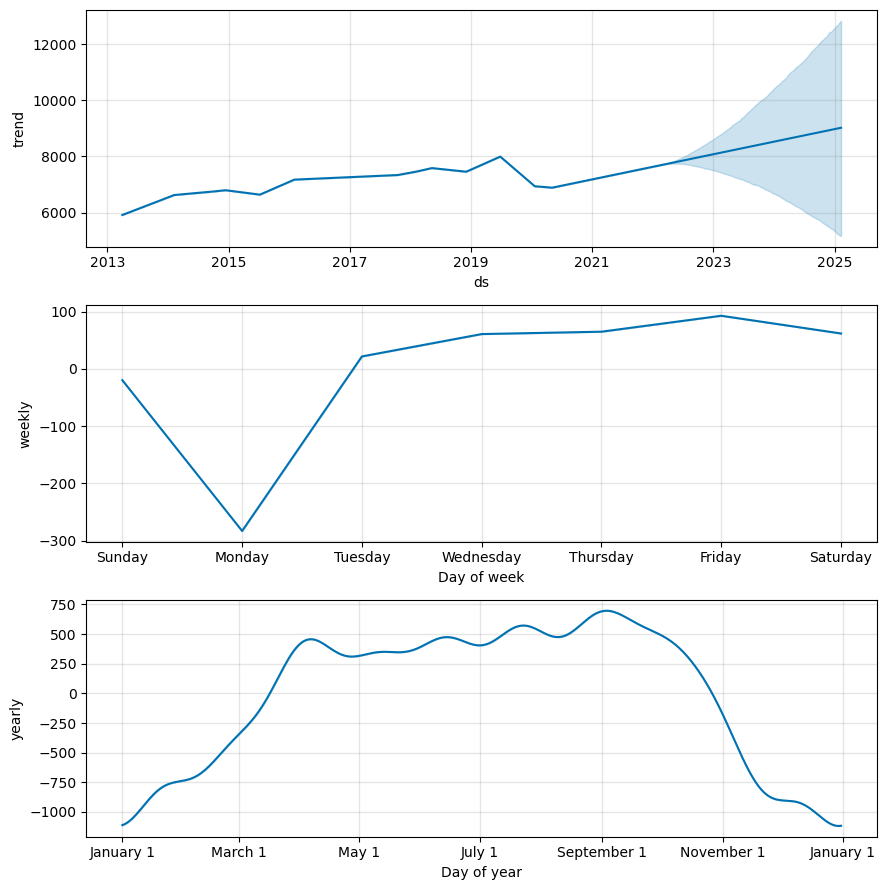

In [33]:
fig2 = model.plot_components(forecast_unknown)

D:\New folder\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\New folder\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


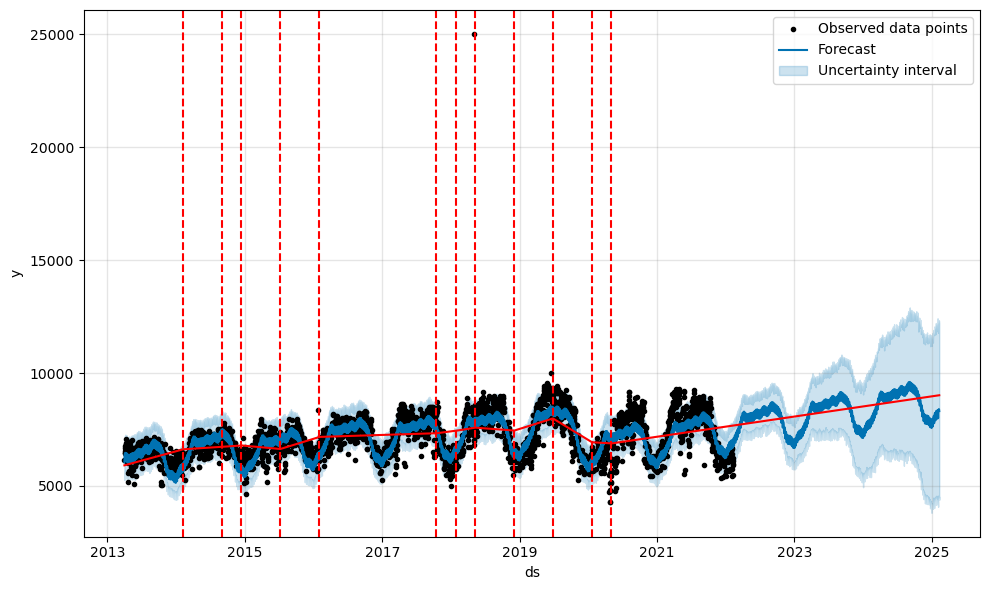

In [34]:
fig = model.plot(forecast_unknown,include_legend=True)
a = add_changepoints_to_plot(fig.gca(),
                             model, forecast_unknown)

## Add changepoints to indicate the time in rapid trend growths. The dotted red lines show the time when there was a rapid change in the trend of the Peak Load.